## LAB 7 - GAUSSIAN MIXTURE MODELS FOR CLASSIFICATION (03.02.2025)

## AIM

To apply Gaussian Mixture models for classification tasks

## ALGORITHM

1. **Import modules and Load the dataset**
- Import all the modules needed to acclomplish the task.
- Load the wine dataset which has features 'alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline'.

2. **Create a data frame**
   
Make the dataset into a DataFrame, including the target variable for clear understanding.

3. **Split the data into features and target**
 - Features (X): The input variables.
 - Target (y): The output variable (Which class 0,1 or 2 the wine belongs to).


4. **Train-Test Split**

Split the dataset into a training set and testing set. Use a function like train_test_split() to divide the data.

5. **Train the GMM Model for Classification**

- Initialize a Gaussian Mixture Model (GMM) for each class with one component (since we treat each class separately as a Gaussian distribution).
- Fit a GMM for each class using the training data where the class corresponds to the target labels.

6. **Predict Class Labels Using GMM**

- For each test sample, compute the log-likelihood for each class's GMM.
- Predict the class of each sample based on the highest log-likelihood score.

7. **Evaluate the Classification Performance**

- Evaluate the model's performance using classification metrics such as accuracy, comparing the predicted labels (y_pred) with the actual labels (y_test).

8. **Dimensionality Reduction (PCA) for Visualization**

   Use Principal Component Analysis (PCA) to reduce the data's dimensionality from the original feature space (13 dimensions for the wine dataset) to 2 dimensions, making it easier to visualize.

9. **Plot the Results**

- Create a scatter plot of the reduced 2D data.
- Color the data points based on their predicted class labels to visualize how well the GMM classifier differentiated the classes.


## DESCRIPTION
A Gaussian Mixture Model (GMM) is a probabilistic model used to represent the presence of subpopulations within an overall population, without requiring the subpopulations to be labeled. It's essentially a combination of multiple Gaussian distributions (normal distributions), each representing a different group or cluster. GMM is a type of unsupervised learning algorithm used for clustering, though it can also be applied to supervised learning tasks like classification.

## CODE AND OUTPUT

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data=load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["Wine Class"]=data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
X = df.drop(["Wine Class"],axis=1)
y = df["Wine Class"]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.4)

In [5]:
gmm_models = {}
for class_label in np.unique(y_train):
    class_data = X_train[y_train==class_label]
    gmm = GaussianMixture(n_components = 1, random_state=42)
    gmm.fit(class_data)

    gmm_models[class_label]=gmm

In [ ]:
y_pred = []

for x in X_test.values:
    
    class_likelihoods = {class_label: gmm_models[class_label].score_samples([x])[0] for class_label in gmm_models}

    predicted_class = max(class_likelihoods, key=class_likelihoods.get)
    y_pred.append(predicted_class)

In [7]:
print("Classification accuracy: ", accuracy_score(y_test, y_pred))

Classification accuracy:  0.9722222222222222


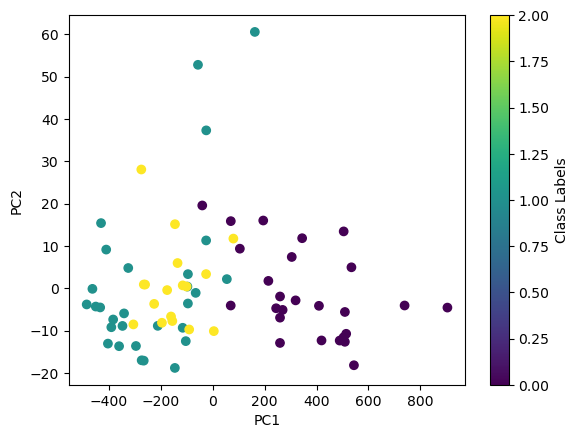

In [8]:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_test)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred,cmap='viridis',marker='o')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Class Labels")
plt.show()

## Result
The Gaussian Mixture Model (GMM) classifier achieves an accuracy of 97.72% by fitting a GMM for each class and predicting the class of test samples based on the highest log likelihood.